In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

<h3> Word2vec

In [7]:
from nltk import sent_tokenize, word_tokenize

#otwieram plik tekstowy z Ojcem Chrzestnym, zapisuje liste list slow
file = open('gfr.txt','r')  
text = file.read().replace('\n','')
GF = [word_tokenize(x.lower()) for x in sent_tokenize(text)] #uwaga: dane nie oczyszczone ze stopwords, interpunkcji

In [13]:
#zostawiam tylko te slowa ktore zawieraja litery

GF_ref = []
for x in GF:
    GF_ref.append([elem for elem in x if elem.isalpha()])

In [14]:
print(GF_ref[:4])

[['amerigo', 'bonasera', 'sat', 'in', 'new', 'york', 'criminal', 'court', 'number', 'and', 'waited', 'for', 'justice', 'vengeance', 'on', 'the', 'men', 'who', 'had', 'so', 'cruelly', 'hurt', 'his', 'daughter', 'who', 'had', 'tried', 'to', 'dishonour', 'her'], ['the', 'judge', 'a', 'formidably', 'man', 'rolled', 'up', 'the', 'sleeves', 'of', 'his', 'black', 'robe', 'as', 'if', 'to', 'physically', 'chastise', 'the', 'two', 'young', 'men', 'standing', 'before', 'the', 'bench'], ['his', 'face', 'was', 'cold', 'with', 'majestic', 'contempt'], ['but', 'there', 'was', 'something', 'fake', 'in', 'alfthis', 'that', 'amerigo', 'bonasera', 'sensed', 'but', 'did', 'not', 'yet', 'understand']]


In [29]:
from gensim.models import Word2Vec #laduje odpowiednią biblioteke do stworzenia modelu Word2Vec

model = Word2Vec(GF_ref, min_count=5, vector_size=10) #bede liczyl tylko te slowa ktore wystepuje minimum 5 razy w tekscie, kazde slowo bedzie opisane przez wektor 10 wymiarowy

In [30]:
word_vectors = model.wv #tu są te wektory

In [31]:
word_vectors.save_word2vec_format('model_word2vec_org', 'model_vocabulary') #zapisuje parametry do plikow (jak bym chcial)

In [32]:
word_vectors["michael"] #embedding dla michael

array([-0.14918895, -0.68309265,  1.8597046 , -1.1122975 ,  0.28803688,
        1.2137811 ,  2.459551  , -0.20470911, -0.8479022 , -1.3818706 ],
      dtype=float32)

In [33]:
word_vectors.most_similar(['michael'], topn=3) #trzy najbardziej podobne slowa

[('sonny', 0.9918200373649597),
 ('hagen', 0.9804325699806213),
 ('kay', 0.9556352496147156)]

In [34]:
word_vectors.most_similar(positive=['michael', 'sonny'], negative=['hagen'], topn=2) #szuka slow podobnych do michael i sonny, ale nie do hagen

[('kay', 0.9335139393806458), ('luparas', 0.9326766729354858)]

In [35]:
word_vectors.similarity('michael', 'kay') #na ile michael i kay są podobne?

0.9556352

In [36]:
word_vectors.doesnt_match(["michael", "vito", "kay"]) #ktore slowo nie pasuje (jest najmniej podobne do reszty)

'vito'

In [37]:
print(dir(word_vectors)) #inne dostepne metody

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_load_specials', '_log_evaluate_word_analogies', '_save_specials', '_smart_save', '_upconvert_old_d2vkv', '_upconvert_old_vocab', 'add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_sims', 'intersect_word2vec_format', 'key_to_index',

https://wolnelektury.pl/katalog/kolekcje/

https://pl.wikisource.org/wiki/Wiki%C5%BAr%C3%B3d%C5%82a:Strona_g%C5%82%C3%B3wna

https://dumps.wikimedia.org/plwiki/

https://nlp.stanford.edu/projects/histwords/

<h3> GloVe

* GloVe tworzy wektory słów na podstawie ich współwystępowania w całym korpusie, podczas gdy Word2Vec uczy się wektorów na podstawie lokalnego kontekstu.

In [4]:
import torchtext #tutaj są wytrenowane embeddingi

In [3]:
glove = torchtext.vocab.GloVe(name="6B", dim=50) #trenowane na Wikipedi, embeddingi wymiaru 50

In [3]:
glove['lion'] #embedding dla lion

tensor([ 0.6009,  0.0129, -0.6103, -0.1387,  1.2507,  0.1013, -0.2007, -1.1283,
         0.6086, -0.1667,  0.2242,  0.6178,  0.5010, -0.2230, -0.0119,  0.2423,
         0.8220,  0.5748, -1.9703,  0.0446,  0.2216, -0.2667, -0.0052, -0.3631,
        -0.4248, -0.7924, -1.5570,  0.2212, -0.3214, -0.4675,  1.0604,  0.8424,
         0.0453,  0.8608, -0.0855,  0.0059, -0.1624, -1.0329, -0.2576, -0.6585,
        -0.1365,  0.3653, -0.6138, -0.5400,  0.2405, -0.2301, -0.3115, -1.3485,
         0.4327, -0.3451])

In [4]:
glove['tiger'] #embedding dla tiger

tensor([ 0.3318, -0.6026, -0.0460,  0.8994,  0.2650, -0.0269, -0.8938, -0.2200,
         0.2816, -0.7974, -0.1552, -0.1539, -0.4443, -0.0606,  0.1767,  0.4966,
         1.0924,  0.6526, -1.4514,  0.5046, -1.4857,  0.6057,  0.5194, -0.3955,
         0.2653, -1.0493, -0.7939, -0.0086, -0.2987, -0.4187,  2.0018, -0.0783,
        -0.7241,  1.3828,  0.5019,  0.3522, -0.3793, -0.8166, -0.5916, -1.0502,
        -0.5553, -0.4653, -0.3038,  0.1106,  1.3216, -0.3473,  0.0396,  0.0464,
        -0.0870, -0.4558])

In [10]:
#odleglosc euklidesowa pomiedzy dwoma wyrazami [słowami]

x = glove['cat']
y = glove['dog']
print(torch.norm(y - x))  # || y - x ||

tensor(1.8846)


In [11]:
#pomocnicza operacja zeby policzyc podobieństwo kosinusowe
torch.tensor([1., 1., 1.]).unsqueeze(0)

tensor([[1., 1., 1.]])

In [12]:
#podobieństwo kosinusowe pomiedzy dwoma wyrazami [słowami]
x = glove['cat']
y = glove['dog']
torch.cosine_similarity(x.unsqueeze(0), y.unsqueeze(0)) #cos(x,y), pamietamy, ze cos(x,x) = 1 oraz cos przyjmuje wartosci od -1 do 1

tensor([0.9218])

<h4> Podobieństwo słów


In [13]:
word = 'cat' #zadane slowo 
other_words = ['dog', 'puppy', 'platypus'] #lista slow

for w in other_words:
    dist = torch.norm(glove[word] - glove[w]) #odległość euklidesowa miedzy 'cat' a kolejnymi slowami z listy
    print(w, float(dist))

dog 1.8846030235290527
puppy 3.0644657611846924
platypus 4.705582141876221


In [14]:
word = 'cat' #zadane slowo
other_words = ['dog', 'puppy', 'platypus'] #lista slow

for w in other_words:
    dist = torch.cosine_similarity(glove[word].unsqueeze(0), glove[w].unsqueeze(0)) #podobienstwo cosinusowe
    print(w, float(dist))

dog 0.9218005537986755
puppy 0.7625599503517151
platypus 0.3413983881473541


In [15]:
#funkcja do wyznaczania slow najbardziej podobnych, domyslnie wyswietla pierwsze 5 takich slow

def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)             #liczy odleglosci do wszystkich slow
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) #sortuje wg odleglosci
    for idx, difference in lst[1:n+1]:                         #zwraca top n wynikow
        print(glove.itos[idx], difference)

In [16]:
print_closest_words(glove['nurse']) #najbardziej podobne slowa do nurse

doctor 3.127453
dentist 3.1306615
nurses 3.26872
pediatrician 3.3212206
counselor 3.3987117


In [25]:
print_closest_words(glove['computer'], 3) #najbardziej podobne slowa do computer

computers 2.4362667
software 2.926823
technology 3.190351


In [26]:
print_closest_words((glove['happy'] + glove['sad']) / 2) #najblizsze slowa ktore są pomiedzy slowem happy i sad

happy 1.9199749
feels 2.360464
sorry 2.4984782
hardly 2.5259297
imagine 2.5652788


In [27]:
print_closest_words((glove['lake'] + glove['building']) / 2) #najblizsze slowa ktore są pomiedzy slowem lake i building

surrounding 3.0698414
nearby 3.1112068
bridge 3.1585503
along 3.1610184
shore 3.161882


Ciekawostki...


                                    king - man + woman ?


Te wektory nie są takie zupełnie bez interpretacji ;)


In [28]:
print_closest_words(glove['king'] - glove['man'] + glove['woman']) #king - man + woman = queen :)

queen 2.8391209
prince 3.661004
elizabeth 3.715252
daughter 3.8317876
widow 3.8493776


In [29]:
print_closest_words(glove['queen'] - glove['woman'] + glove['man']) #queen - woman + man  = king  ;)

king 2.8391206
prince 3.2508988
crown 3.4485192
knight 3.5587437
coronation 3.6198907


In [30]:
print_closest_words(glove['uncle'] - glove['man'] + glove['woman'])  #uncle - man + woman = aunt

grandmother 2.323353
aunt 2.352789
granddaughter 2.3615324
daughter 2.4039288
uncle 2.6026237


In [32]:
print_closest_words(glove['programmer'] - glove['good'] + glove['bad']) #programmer - good + bad = hacker

hacker 3.838365
glitch 4.003873
originator 4.041952
hack 4.047719
serial 4.2250676


In [33]:
print_closest_words(glove['doctor'] - glove['man'] + glove['woman'])  #doctor - man + woman  = nurse

nurse 3.1355348
pregnant 3.780537
child 3.78347
woman 3.8643105
mother 3.9222305


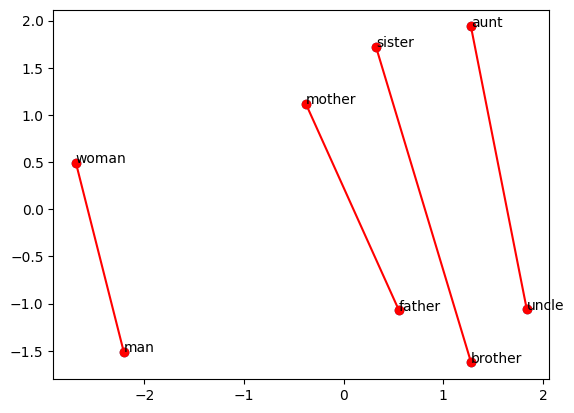

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


X = []
words = ['woman', 'man', 'sister','brother', 'uncle', 'aunt', 'mother', 'father'] #wybieram grupe slow
for word in words:
    X.append(glove[word].tolist()) #patrze jakie mają embeddingi
    
X = np.array(X) #tworze z nich macierz

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)  #redukuje liczbe zmiennych z 50 do 2 dla kazdego slowa


#Do rysowania: 

x = X_pca[:,0] #pierwsza zmienna
y = X_pca[:,1] #druga zmienna


plt.scatter(x,y)

for i, txt in enumerate(words):
    plt.annotate(txt, (x[i], y[i]))
    
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
    
plt.show()

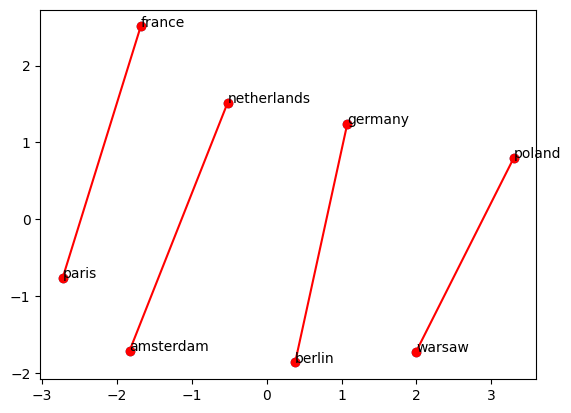

In [35]:
X = []
words = ['france', 'paris', 'poland','warsaw', 'germany', 'berlin', 'netherlands', 'amsterdam'] #wybieram grupe slow
for word in words:
    X.append(glove[word].tolist()) #patrze jakie mają embeddingi
    
X = np.array(X) #tworze z nich macierz

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)  #redukuje liczbe zmiennych z 50 do 2 dla kazdego slowa


#Do rysowania: 

x = X_pca[:,0] #pierwsza zmienna
y = X_pca[:,1] #druga zmienna


plt.scatter(x,y)

for i, txt in enumerate(words):
    plt.annotate(txt, (x[i], y[i]))
    
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
    
plt.show()

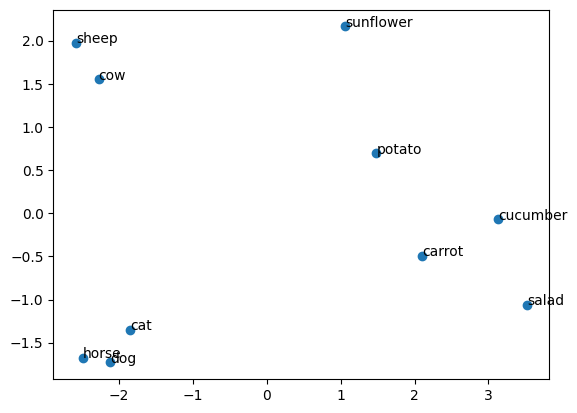

In [36]:
X = []
words = ['dog', 'cat', 'cow', 'horse', 'sheep', 'sunflower', 'carrot', 'salad', 'potato','cucumber'] #wybieram grupe slow
for word in words:
    X.append(glove[word].tolist()) #patrze jakie mają embeddingi
    
X = np.array(X) #tworze z nich macierz

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)  #redukuje liczbe zmiennych z 50 do 2 dla kazdego slowa


#Do rysowania: 

x = X_pca[:,0] #pierwsza zmienna
y = X_pca[:,1] #druga zmienna


plt.scatter(x,y)

for i, txt in enumerate(words):
    plt.annotate(txt, (x[i], y[i]))
    
plt.show()

* Zastosowanie - szukanie informacji w tekście

In [37]:
tekst = "The Godfather is a classic novel written by Mario Puzo in 1969 and later adapted into a legendary film trilogy directed by Francis Ford Coppola. The story revolves around the powerful Italian-American Mafia family, the Corleones, led by Don Vito Corleone. The novel and films explore themes of power, loyalty, family, and the moral complexities of crime. Don Vito Corleone is a respected and feared Mafia boss who believes in honor and justice within his own code of ethics. He helps those who come to him in need but expects loyalty and favors in return. His three sons—Sonny, Fredo, and Michael—each have different attitudes toward the family's criminal empire. The youngest of Don Vito’s sons is named Michael, and he initially wants nothing to do with the family business. However, after a series of tragic events, Michael is drawn into the world of organized crime and eventually becomes the new head of the family. The transformation of Michael Corleone is one of the most compelling aspects of The Godfather. At first, he is an idealistic war hero who wishes to lead an honest life, but circumstances force him to make ruthless decisions. Over time, he becomes even more powerful and feared than his father, sacrificing his morality and personal relationships for the sake of the family’s survival. The Godfather films, particularly the first two, are considered among the greatest movies of all time. They depict not only the brutal reality of the Mafia but also the deep emotional bonds and conflicts within the Corleone family. The saga remains a timeless masterpiece that continues to captivate audiences worldwide."
print(tekst)
question = "What is the name of the youngest son of Vito?"
print()
print(question)

The Godfather is a classic novel written by Mario Puzo in 1969 and later adapted into a legendary film trilogy directed by Francis Ford Coppola. The story revolves around the powerful Italian-American Mafia family, the Corleones, led by Don Vito Corleone. The novel and films explore themes of power, loyalty, family, and the moral complexities of crime. Don Vito Corleone is a respected and feared Mafia boss who believes in honor and justice within his own code of ethics. He helps those who come to him in need but expects loyalty and favors in return. His three sons—Sonny, Fredo, and Michael—each have different attitudes toward the family's criminal empire. The youngest of Don Vito’s sons is named Michael, and he initially wants nothing to do with the family business. However, after a series of tragic events, Michael is drawn into the world of organized crime and eventually becomes the new head of the family. The transformation of Michael Corleone is one of the most compelling aspects of

In [38]:
q = sum([glove[w] for w in word_tokenize(question)])

for i, elem in enumerate(sent_tokenize(tekst.lower())):
    x = sum([glove[w] for w in word_tokenize(elem)])
    print(torch.cosine_similarity(q.unsqueeze(0), x.unsqueeze(0)), i)

tensor([0.8793]) 0
tensor([0.9045]) 1
tensor([0.9174]) 2
tensor([0.9366]) 3
tensor([0.8945]) 4
tensor([0.9358]) 5
tensor([0.9679]) 6
tensor([0.9521]) 7
tensor([0.9485]) 8
tensor([0.9223]) 9
tensor([0.9412]) 10
tensor([0.9315]) 11
tensor([0.9315]) 12
tensor([0.8710]) 13


In [39]:
sent_tokenize(tekst.lower())[6]

'the youngest of don vito’s sons is named michael, and he initially wants nothing to do with the family business.'

<h3> Analiza tonu wypowiedzi zdań (Sentiment Analysis)

In [5]:
import csv


#Funkcja do zaladowania danych; dostępne do pobrania są np tutaj: https://github.com/crwong/cs224u-project/blob/master/data/sentiment/training.1600000.processed.noemoticon.csv
#Mozna nie pobierac, tych danych tylko sobie przeanalizowac ten przyklad; pokazuje go zeby pokazac ze czasem prosta siec daje porownywalne
#wyniki co ta bardziej zlozona

def get_data():
    return csv.reader(open("training.1600000.processed.noemoticon.csv", "rt", encoding="latin-1"))

#wyswietlam pierwszych 5 tweetow - jak wyglądają rekordy?
for i, line in enumerate(get_data()): 
    if i > 4:
        break
    print(line)

['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]
['0', '1467810672', 'Mon Apr 06 22:19:49 PDT 2009', 'NO_QUERY', 'scotthamilton', "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"]
['0', '1467810917', 'Mon Apr 06 22:19:53 PDT 2009', 'NO_QUERY', 'mattycus', '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds']
['0', '1467811184', 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'ElleCTF', 'my whole body feels itchy and like its on fire ']
['0', '1467811193', 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'Karoli', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]


Nas interesować będzie tylko pierwsza i ostatnia kolumna:

- 0 oznacza wiadomość typu "sad", a 4 typu "happy"
- ostatatnia kolumna zawiera tweet

In [8]:
#patrzymy ile slow [z embeddingami] jest w pierwszych 10 tweetach [pozniej, tylko te slowa będą brane do analizy; slowa bez embeddingow będziemy ignorowac]

for i, line in enumerate(get_data()): #przechodze dane 
    if i > 10:
        break
    print(sum(int(w in glove.stoi) for w in word_tokenize(line[-1].lower()))) #licze ile slow z tweetu jest ma embeddingi

26
25
20
10
29
5
3
26
7
4
9


In [9]:
import torch
import torch.nn as nn

def get_tweet_vectors(glove_vector):
    train, valid, test = [], [], [] #tworze trzy listy na dane train, valid i test
    for i, line in enumerate(get_data()): #przechodze dane 
        tweet = line[-1]                  #tweet to ostatni element 
        tweet_emb = sum(glove_vector[w] for w in word_tokenize(tweet.lower())) #wektor tweeta będzie sumą embeddingow slow w niego wchodzących
        label = torch.tensor(int(line[0] == "4")).long() #generuje dwa rodzaje labelow: 1 - gdy happy, 0 gdy sad
            
        #dzielimy dane na trzy kategorie
        if i % 5 < 3:     #czyli 0,1,2
            train.append((tweet_emb, label)) # 60% danych treningowych
        elif i % 5 == 3: #czyli 3
            valid.append((tweet_emb, label)) # 20% danych do walidacji
        else:            #czyli gddy i%5 jest 4
            test.append((tweet_emb, label)) # 20% danych testowych
    return train, valid, test

In [10]:
train, valid, test = get_tweet_vectors(glove) #przygotowuje sobie dane w oparciu o gotowe embeddingi z glove

#za kazdym razem będzie bral 128 rekordow (przy trenowaniu) i co epoke tasujemy (shuffle = True)
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

In [44]:
import matplotlib.pyplot as plt

In [11]:
#Funkcja wyznaczająca dokładność predykcji:
def get_accuracy(model, data_loader):
    model.eval()
    correct, total = 0, 0  #ile ok, ile wszystkich
    with torch.no_grad():
        for tweets, labels in data_loader: #przechodzi dane
            output = model(tweets)         #jak dziala model
            pred = output.max(1, keepdim=True)[1]  #ktora kategoria
            correct += pred.eq(labels.view_as(pred)).sum().item()
            total += labels.shape[0]
    return correct / total

In [12]:
def train_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []

    print("Dokładności przed treningiem")
    print("treningowy: ", get_accuracy(model, train_loader))
    print("walidacyjny: ", get_accuracy(model, valid_loader))
    epochs.append(-1)
    train_acc.append(get_accuracy(model, train_loader))
    valid_acc.append(get_accuracy(model, valid_loader))

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0

        for tweets, labels in train_loader:
            optimizer.zero_grad()
            pred = model(tweets)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(train_loader)
        losses.append(avg_epoch_loss)

        if epoch % 10 == 0:
            epochs.append(epoch)
            train_acc.append(get_accuracy(model, train_loader))
            valid_acc.append(get_accuracy(model, valid_loader))
            print(f'Epoch {epoch+1} | Loss: {avg_epoch_loss:.4f} | Train Acc: {train_acc[-1]:.3f} | Valid Acc: {valid_acc[-1]:.3f}')

    # wykres strat
    plt.title("Loss per Epoch")
    plt.plot(losses, label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # wykres dokładności
    plt.title("Accuracy")
    plt.plot(epochs, train_acc, label="Train Accuracy")
    plt.plot(epochs, valid_acc, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Dokładności przed treningiem
treningowy:  0.4673333333333333
walidacyjny:  0.46975
Epoch 1 | Loss: 0.6361 | Train Acc: 0.667 | Valid Acc: 0.667
Epoch 11 | Loss: 0.5683 | Train Acc: 0.700 | Valid Acc: 0.680
Epoch 21 | Loss: 0.5469 | Train Acc: 0.716 | Valid Acc: 0.692
Epoch 31 | Loss: 0.5426 | Train Acc: 0.718 | Valid Acc: 0.694
Epoch 41 | Loss: 0.5266 | Train Acc: 0.729 | Valid Acc: 0.694
Epoch 51 | Loss: 0.5202 | Train Acc: 0.732 | Valid Acc: 0.689
Epoch 61 | Loss: 0.5103 | Train Acc: 0.736 | Valid Acc: 0.685
Epoch 71 | Loss: 0.5097 | Train Acc: 0.733 | Valid Acc: 0.693
Epoch 81 | Loss: 0.5030 | Train Acc: 0.741 | Valid Acc: 0.683
Epoch 91 | Loss: 0.5036 | Train Acc: 0.738 | Valid Acc: 0.692


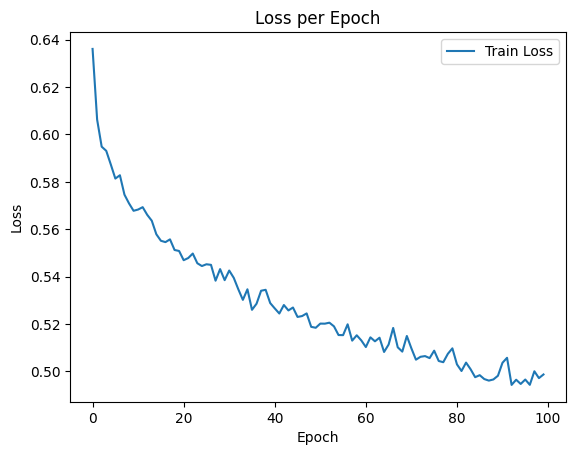

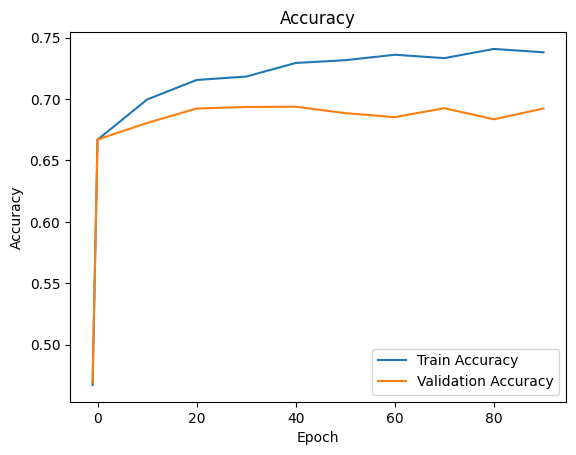

In [13]:
#Siec neuronową moge zdefiniowac w taki uproszczony spoosob
mymodel = nn.Sequential(nn.Linear(50, 30),  #przekształcenie liniowe R^50 ---> R^30
                        nn.ReLU(),          #wyniki przekształcam funkcją ReLU
                        nn.Linear(30, 10),  #kolejne przekształcenie liniowe R^30--->R^10
                        nn.ReLU(),          #znow ReLU
                        nn.Linear(10, 2))   #znow przekształcenie liniowe, efekt: 2 liczby
                        

train_network(mymodel, train_loader, valid_loader, num_epochs=100, learning_rate=0.01)

In [14]:
print("Final test accuracy:", get_accuracy(mymodel, test_loader)) #dokldnosc na zbiorze testowym

Final test accuracy: 0.68475


In [15]:
#funkcja do testowania nowych tweetow

def test_model(model, glove_vector, tweet):
    emb = sum(glove_vector[w] for w in word_tokenize(tweet.lower())) #przerabiam tweet na sume embieddingpw
    out = mymodel(emb.unsqueeze(0)) #co powie model
    pred = out.max(1, keepdim=True)[1] #ktora kategoria bardziej prawdopodobna
    return pred

In [16]:
test_model(mymodel, glove, "very happy")

tensor([[1]])

In [17]:
test_model(mymodel, glove, "sad days")

tensor([[0]])

Dokładności przed treningiem
treningowy:  0.50125
walidacyjny:  0.49825
Epoch 1 | Loss: 3.7089 | Train Acc: 0.505 | Valid Acc: 0.501
Epoch 11 | Loss: 0.9135 | Train Acc: 0.546 | Valid Acc: 0.549
Epoch 21 | Loss: 0.7391 | Train Acc: 0.601 | Valid Acc: 0.615
Epoch 31 | Loss: 0.6608 | Train Acc: 0.643 | Valid Acc: 0.652
Epoch 41 | Loss: 0.6295 | Train Acc: 0.666 | Valid Acc: 0.670
Epoch 51 | Loss: 0.6150 | Train Acc: 0.676 | Valid Acc: 0.678
Epoch 61 | Loss: 0.6084 | Train Acc: 0.680 | Valid Acc: 0.678
Epoch 71 | Loss: 0.6048 | Train Acc: 0.683 | Valid Acc: 0.679
Epoch 81 | Loss: 0.6027 | Train Acc: 0.681 | Valid Acc: 0.681
Epoch 91 | Loss: 0.6021 | Train Acc: 0.678 | Valid Acc: 0.684


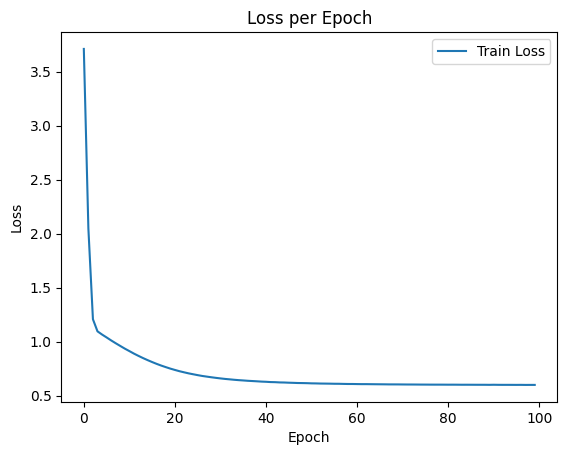

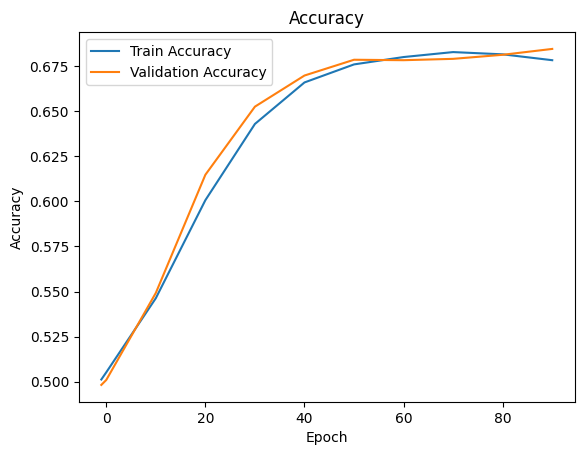

Final test accuracy: 0.69575


In [18]:
#prostszy model 
mymodel2 = nn.Linear(50, 2)
train_network(mymodel2, train_loader, valid_loader, num_epochs=100, learning_rate=1e-4)

print("Final test accuracy:", get_accuracy(mymodel2, test_loader))

<h4> Zadanie1: Rozważ teksty należące do 20 kategorii. Zbuduj model przewidujący kategorię w oparciu o reprezentacje wektorową słów GloVe (embeddingi) oraz sieć neuronową. Wyodrębnij także zbiór walidacyjny. Tekst reprezentujemy jako średnią arytmetyczną embeddingów wchodzących w skład recenzji. Zbuduj różne topologie sieci, potestuj batch_size, porównaj ich efektywność. Dodatkowo:
    <br>
    <br>
    
- Wygeneruj wykresy wartości funkcji kosztu vs liczby epok oraz Dokładności vs liczby epok. Dodatkowo, zaimplementuj funkcję oceny topk accuracy (czy rzeczywisty jest w top k przewidywanych, k - parametr, dośmylnie k=3). Narysuj analogiczne wykresy dla $k=3$.

- Jakie są zalety stosowania embeddingów w stosunku do klasycznych reprezentacji BOW (bag of words) czy SOW (set of words)?
    
- Jakie są zalety i wady proponowanej w zadaniu reprezentacji tekstu (średniej z embeddingów)?


In [19]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')

In [20]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [30]:
print(newsgroups_train["target_names"])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [21]:
X = newsgroups_train["data"]
y = newsgroups_train["target"]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_r, y_train, y_r = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_r, y_r, test_size=0.5, random_state=42)

In [28]:
#moze sie przydac

In [29]:
x = torch.tensor([3, 1, -2, 8, 0])
print(torch.topk(x, 3))

torch.return_types.topk(
values=tensor([8, 3, 1]),
indices=tensor([3, 0, 1]))


<h3> Uzupełnienie: język polski

In [5]:
import spacy 
nlp = spacy.load("pl_core_news_md") #potrzebny większy model niz uprzednio https://spacy.io/models/pl, polecam nawet pl_core_news_lg

In [68]:
print(nlp.vocab['film'].vector) #polskie embeddingi tez są :)

[-7.4547   -1.8492   -0.70292   3.108    -3.7143    3.0871   -1.3974
  1.3252    2.5455    3.2635    0.41413  -1.8116    1.5274    3.747
  0.28865  -3.8842   -0.9197   -3.3196    3.8737    2.8252   -0.26964
 -2.3708   -2.6654   -1.1841    0.15447   0.73748   5.2109   -1.0732
  2.1572   -1.4507   -0.95084   1.4292    2.182    -1.9248   -2.5257
 -0.95694  -2.9952   -3.1219    2.9781   -3.7135    4.1783   -3.8784
  1.61      2.1234    1.1705   -1.7251    1.1271    3.5731   -0.056633
  1.7764    1.3294    1.0516    1.8621   -1.8954    4.8511    2.7122
 -3.7288    1.2753   -0.93571  -1.5568   -6.7451    6.2769   -2.5904
  1.9201   -4.7094    4.5084   -0.74136   2.2447   -0.61638  -4.2454
  4.4568    0.78156   1.4283   -1.8499    1.7534    2.3741    0.085495
  0.46573   2.3606   -2.475     2.5915   -0.8652    3.6735   -0.11675
 -2.8695   -3.3869    2.6629   -1.1346    1.9168   -3.3827    0.50006
  0.31977  -2.7926   -0.050619 -3.0206    2.5213    2.3252    1.9798
  5.6008   -4.0283    4.4352

In [69]:
#podobienstwo slow --> cosinusowe
banan = nlp.vocab['banan']
pies = nlp.vocab['pies']
kot = nlp.vocab['kot']
 
print(pies.similarity(kot), pies.similarity(banan))

0.8419461250305176 0.04055905342102051


In [70]:
#mozna tez uzywac do zdan --> cosinusowe

target = nlp("Ten film był super") 
tekst1 = nlp("To był świetny film")
tekst2 = nlp("Okropny film")
 
print(target.similarity(tekst1))  
print(target.similarity(tekst2))  
 

0.8475700263117251
0.5869053835044575


- zdanie to średnia słów

In [74]:
target = nlp("Ten film był super") 
a = target.vector
print(a[:5])

[-3.08835   -1.1211874  1.03456    2.1699252 -3.002875 ]


In [75]:
y = (nlp("Ten").vector +nlp("film").vector+nlp("był").vector +nlp("super").vector)/4
print(y[:5])

[-3.08835   -1.1211874  1.03456    2.1699252 -3.002875 ]


<h4> Zadanie2: Zbuduj model do obsługi pytań gości do hotelu. Po otrzymania pytania użytkownik otrzymuje kolejno 3 informacje:
    
- Trafność - ocena liczbowa (np. na podstawie podobieństwa cosinusowego) czy nasze pytanie mieści się w którejś z kategorii, w przypadku niskiej wartości (jakiej?) należy zwrócić informację typu "Proszę o zadanie innego pytania"
- W przypadku gdy Trafność przekroczy zadany próg, pojawia się dodatkowo informacja odnośnie potencjalnej kategorii zapytania (jedzenie i napoje, płatność lub udogodnienia) - można to zrobić na podstawie poodobieństwa do najlepszego zapytania lub średniej z kategorii
- Następnie pojawia się odpowiedź, związana z najbardziej podobnym zapytaniem w bazie danych
    
    
    
W razie potrzeby możesz poszerzyć bazę pytań, kategorii. Można też bardziej rozbudować sposób wyszukiwania pytania. Wszelkie usprawnienia mile widziane :)
    
    
 

* Wejście od użytkownika

In [31]:
s = input("Podaj liczbe: ")
print("Twoja liczba to",s)

Podaj liczbe: 5
Twoja liczba to 5


In [9]:
hotel_czat() #przykladowe dzialanie

--> Witaj! Czy mogę jakoś pomóc? || Czy mogę zamówić śniadanie do pokoju?

Dopasowanie/Trafność:  100 %

Pytanie należy do kategorii:  jedzenie i napoje

Tak, oczywiście. Proszę o podanie godziny dostawy.


--> Czy moge jeszcze w czymś pomóc? Jeżeli nie, to napisz NIE || Czy jest Wi-Fi?

Dopasowanie/Trafność:  98 %

Pytanie należy do kategorii:  udogodnienia

Tak, bezpłatne Wi-Fi jest dostępne na terenie całego hotelu.


--> Czy moge jeszcze w czymś pomóc? Jeżeli nie, to napisz NIE || Czy istnieje życie w kosmosie?

Dopasowanie/Trafność:  82 %

Chyba nie potrafię Ci w tym pomóc :(


--> Czy moge jeszcze w czymś pomóc? Jeżeli nie, to napisz NIE || NIE

W porządku. Miłego pobytu!



<h2> Tokenizatory i Embeddingi kontekstowe

* Tokenizator BERT używa tzw. techniki WordPiece Tokenization, która pozwala mu radzić sobie nawet z nieznanymi słowami (czyli out-of-vocabulary).

In [23]:
from transformers import BertTokenizer, BertModel
import torch

# Wczytanie modelu BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize("biology") #popularne slowo! 
print(tokens)

tokens = tokenizer.tokenize("biolohy") #tego slowa nie było ;( 
print(tokens)


tokens = tokenizer.tokenize("bioinformatics")  #to bylo, ale byc moze niezbyt często ##-oznacza ze to nie jest początkowy token
print(tokens)

tokens = tokenizer.tokenize("I like bioinformatics so much")
print(tokens)

['biology']
['bio', '##loh', '##y']
['bio', '##in', '##form', '##atics']
['i', 'like', 'bio', '##in', '##form', '##atics', 'so', 'much']


Porównanie

* GloVe – przypisuje jedno wektorowe przedstawienie dla każdego słowa niezależnie od kontekstu.

* BERT – generuje różne embeddingi dla tego samego słowa zależnie od kontekstu

In [30]:
model = BertModel.from_pretrained('bert-base-uncased')

#Tokenizacja
inputs = tokenizer("I have bear, please do not bear me. It is bioinformatics", return_tensors="pt") #pt -> wynikiem są tensory dla pytorch

#Forward przez model (bez gradientów)
with torch.no_grad():
    outputs = model(**inputs)

#Weź embeddingi z ostatniej warstwy
embeddings = outputs.last_hidden_state  # shape: [1, seq_len, 768]

#Zamiana ID na tokeny
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

#Wypisz tokeny i embeddingi, CLS = poczatek, SEP = separator/koniecS
for token, embedding in zip(tokens, embeddings[0]):
    print(f"{token:12} => {embedding[:5]} ...")  # pokazuje tylko pierwsze 5 liczb

[CLS]        => tensor([-0.1020,  0.1224, -0.0742, -0.2762, -0.3269]) ...
i            => tensor([ 0.2233,  0.5518,  0.4030, -0.9121, -0.0750]) ...
have         => tensor([ 0.1388,  0.9120,  0.1499, -0.5301,  0.0521]) ...
bear         => tensor([ 0.4193,  0.4981,  0.2273, -0.4858,  0.3158]) ...
,            => tensor([-0.1474,  0.7827,  0.8424,  0.3180,  0.6843]) ...
please       => tensor([-0.2526,  0.5112,  0.7047, -0.7444, -0.0449]) ...
do           => tensor([ 0.2211,  0.3049,  0.4429, -1.2220, -0.1172]) ...
not          => tensor([ 0.0704, -0.3303,  0.3225, -0.4149,  0.5368]) ...
bear         => tensor([ 1.1456,  1.2415,  0.6915, -0.4820,  0.4666]) ...
me           => tensor([-0.1233, -0.0601, -0.1967, -0.5395, -0.0827]) ...
.            => tensor([ 0.8213,  0.4031, -0.4484,  0.4322, -0.1434]) ...
it           => tensor([ 0.2445,  0.0560, -0.1301, -0.5697,  0.2753]) ...
is           => tensor([ 0.3034,  0.7958,  0.0625, -0.9171,  0.2296]) ...
bio          => tensor([ 0.0919,  0.76